# Throw darts randomly to get $\pi$ ...

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
darts = np.random.random((100,2))

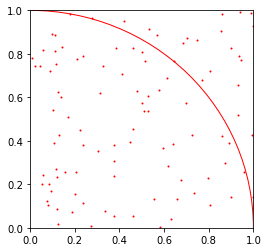

In [24]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()
ax.set_xlim([0,1])
ax.set_ylim([0,1])
circle = plt.Circle((0, 0), 1.0, color='r', fill=False)
ax.add_artist(circle)
plt.scatter(darts[:,0],darts[:,1],s=1,color='r')

In [30]:
NSamples = 100000
darts = np.random.random((NSamples,2))

pi = []

inside  = 0
count = 0

for dart in darts:
    count += 1
    if np.linalg.norm(dart) < 1:
        inside += 1
    pi.append(4*(inside/count))

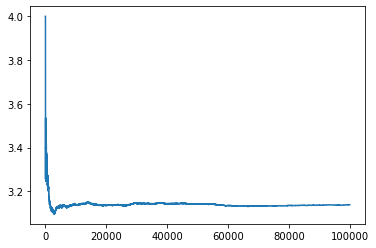

In [32]:
plt.plot(pi)

# Integration by random sampling ...

$$f(x) = x$$
$$\int_0^2 f(x) dx = 2$$

In [36]:
avfx = 0
NSample = 100000
xmax = 2
xmin = 0
for i in range(NSample):
    x = 2*np.random.random()
    avfx += x
print(f"Result = {(xmax - xmin) * avfx/NSample}")

Result = 1.9990112629140842


# Monte Carlo sampling (Importance Sampling) using Metropolis algorithm ...

$$V(x) = \frac{1}{2} k x^2$$

$$<V> = \frac{\int_{-\infty}^{\infty} V(x) exp(-\beta V(x)) dx}{Q} = \frac{\int_{-\infty}^{\infty} V(x) exp(-\beta V(x)) dx}{\int_{-\infty}^{\infty} exp(-\beta V(x)) dx} = 1/2\beta = \frac{1}{2} k_B T$$ 

In [4]:
def V(x, k=1):
    return 0.5*k*x**2

In [5]:
NSteps = 100000
MAXL = 1
BETA = 1
coord = np.zeros(NSteps+1)
nrg = np.zeros(NSteps+1)

In [6]:
# x0 = 10
coord[0] = 10
nrg[0] = V(coord[0])
xold = coord[0]
nrgold = nrg[0]

In [7]:
for step in range(NSteps):
    # Attempt a trial move
    #dx = MAXL * 2*np.random.random() - 1
    dx = np.random.uniform(-MAXL, MAXL)
    xnew = xold + dx
    nrgnew = V(xnew)
    dE = nrgnew - nrgold
    prob = np.exp(-BETA*dE)
    # Select the trial with probability "prob"
    if np.random.random() < prob:
        xold = xnew
        nrgold = nrgnew
    #else:
        # STAY !!!
    coord[step+1] = xold
    nrg[step+1] = nrgold

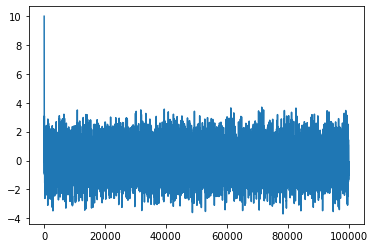

In [89]:
plt.plot(coord)

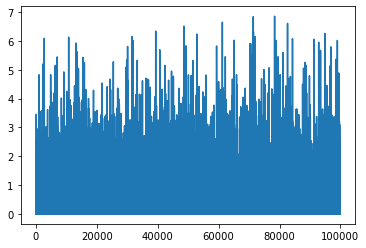

In [80]:
plt.plot(nrg[100:])

In [87]:
nrg[:100000].mean()

0.5053472379993843

In [88]:
nrg[100:10000].mean()

0.4804691376017119

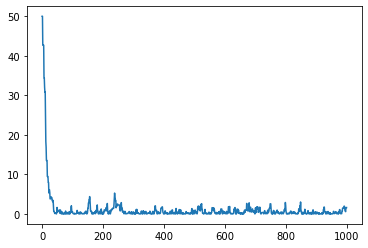

In [75]:
plt.plot(nrg)

# Probability distribution / Histogram

$$P(x) = \frac{exp(-\beta V(x))}{Q} = \frac{exp(-\beta (k/2) x^2)}{Q} = \frac{exp(- x^2 /2)}{\sqrt(2 \pi)}  $$ 

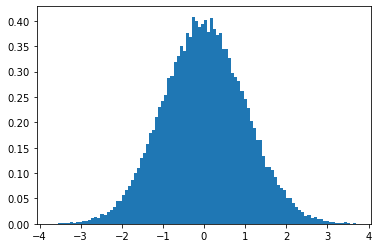

In [97]:
plt.hist(coord[100:], bins=100, density=True)
plt.show()

In [100]:
# Analytically estimated height of the distribution ...
1/(2*np.pi)**0.5

0.3989422804014327

# Monte Carlo (MC) for 2D Harmonic Oscillator

$$V(x,y) = \frac{1}{2} (k_x x^2 + k_y y^2) $$

In [103]:
def V(pos, kx=1, ky=1):
    return 0.5*(kx*pos[0]**2 + ky*pos[1]**2)

In [117]:
MAXL = 1
BETA = 1
kx = 3
ky = 1

NSteps = 1000
coord = np.zeros((NSteps+1,2))
nrg = np.zeros(NSteps+1)

# (x0, y0) = (8, 8)
coord[0] = [8, 8]
nrg[0] = V(coord[0], kx, ky)
xold = coord[0]
nrgold = nrg[0]

In [118]:
for step in range(NSteps):
    # Attempt a trial move
    #dx = MAXL * 2*np.random.random() - 1
    dx = np.random.uniform(-MAXL, MAXL, 2)
    xnew = xold + dx
    nrgnew = V(xnew, kx, ky)
    dE = nrgnew - nrgold
    prob = np.exp(-BETA*dE)
    # Select the trial with probability "prob"
    if np.random.random() < prob:
        xold = xnew
        nrgold = nrgnew
    #else:
        # STAY !!!
    coord[step+1] = xold
    nrg[step+1] = nrgold

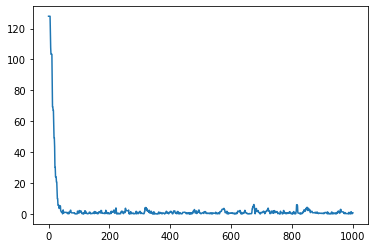

In [119]:
plt.plot(nrg)

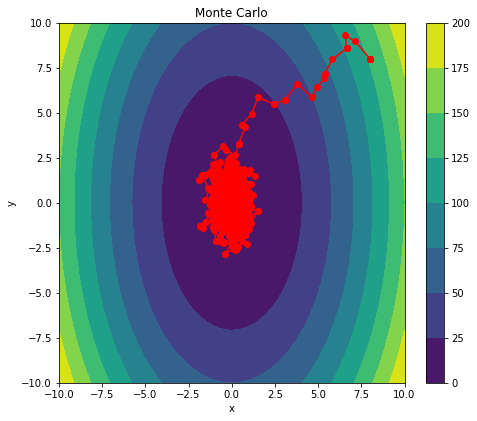

In [120]:
# Plotting starts here ...
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.0, 0.0, 1.0, 1.0
ax = fig.add_axes([left, bottom, width, height])

start, stop, n_values = -10, 10, 1000

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = 0.5*(kx*X**2 + ky*Y**2)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

ax.set_title('Monte Carlo')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.plot(coord[:,0],coord[:,1],"ro-")
plt.show()